# Naive Bayes Classification

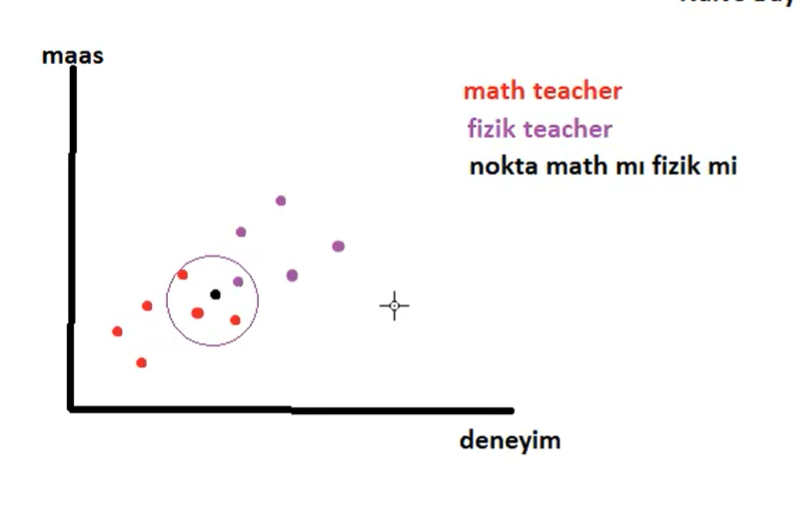

Bir tane örnek üzerinden gidecek olursak kırmızı noktalar matematik , mor noktalar fizik öğretmeni olsun. Siyah noktanın ne öğretmeni olduğunu bulmak için Naive Bayes Classification'ı kullanalım.<br>

P(Math|X) = (P(X|Math)*P(Math)) / P(X)<br>

1) P(Math) -> Prior Probability = kırmızınokta/Tplam nokta sayısı -> 6/11<br>
2) P(X) -> Marginal likelihood  = Belirlediğimiz range içinde ki data /Toplam data -> 4/11  <br>
3) P(X|Math) -> Likelihood =  Belirlediğimiz range içindeki matematik sayısı/ Matematik'e göre -> 3/6 <br>
4) P(Math|X) -> Probability of math olma x'e göre   

P(Math|X) = (3/6)*(6/11)/ (4/11) = 3/4 yani %75 çıkıyor
Aynı durumu fizik için de yaparsak 
P(Fizik|X) = (1/5)*(5/11) / (4/11) = 1/4 yani %25 çıkıyor 


Python ile 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("data.csv")

In [7]:
#gereksiz columnları kaldırmak için
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
# malignant = M kötü huylu tümor
# benign = B iyi huylu tümor

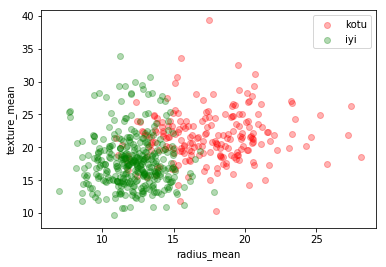

In [9]:
#Visulation
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# Scatter PLOT
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha=0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [11]:
#  M ve B yi stringten integer'a ceviriyorz
data.diagnosis = [1 if i == "M" else 0 for i in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [12]:
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [14]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None)

In [25]:
#test
print("print accuracy of naive bayes algo:", nb.score(x_test,y_test)) 

print accuracy of naive bayes algo: 1.0
